In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Show the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Shape and data info
print("🧾 Shape:", df.shape)
print("\n🔍 Info:")
print(df.info())

# Summary stats
df.describe()

🧾 Shape: (768, 9)

🔍 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Check how many 0s in important columns
print((df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [4]:
# Replace 0s with NaN
df_clean = df.copy()
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_clean[cols] = df_clean[cols].replace(0, pd.NA)

# Drop rows with missing values
df_clean = df_clean.dropna()

# Check new shape
print("✅ Cleaned data shape:", df_clean.shape)

✅ Cleaned data shape: (392, 9)


In [5]:
print("📊 Average Age:", df_clean['Age'].mean())
print("🤰 Average Pregnancies:", df_clean['Pregnancies'].mean())
print("🧬 Diabetes Positive Cases:", df_clean[df_clean['Outcome'] == 1].shape[0])
print("🧬 Diabetes Negative Cases:", df_clean[df_clean['Outcome'] == 0].shape[0])

📊 Average Age: 30.864795918367346
🤰 Average Pregnancies: 3.3010204081632653
🧬 Diabetes Positive Cases: 130
🧬 Diabetes Negative Cases: 262


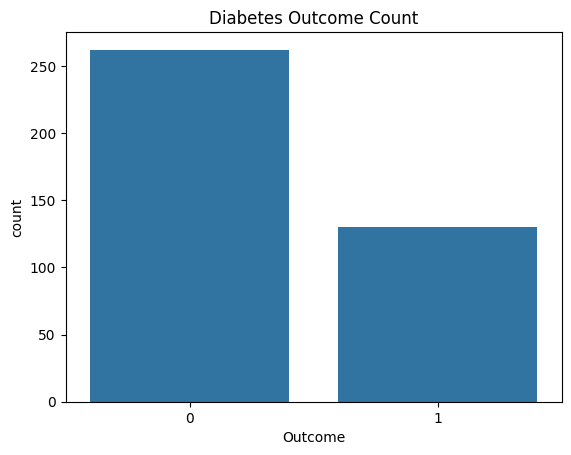

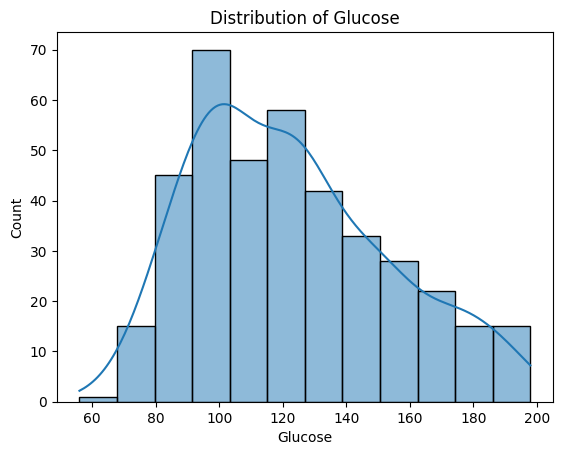

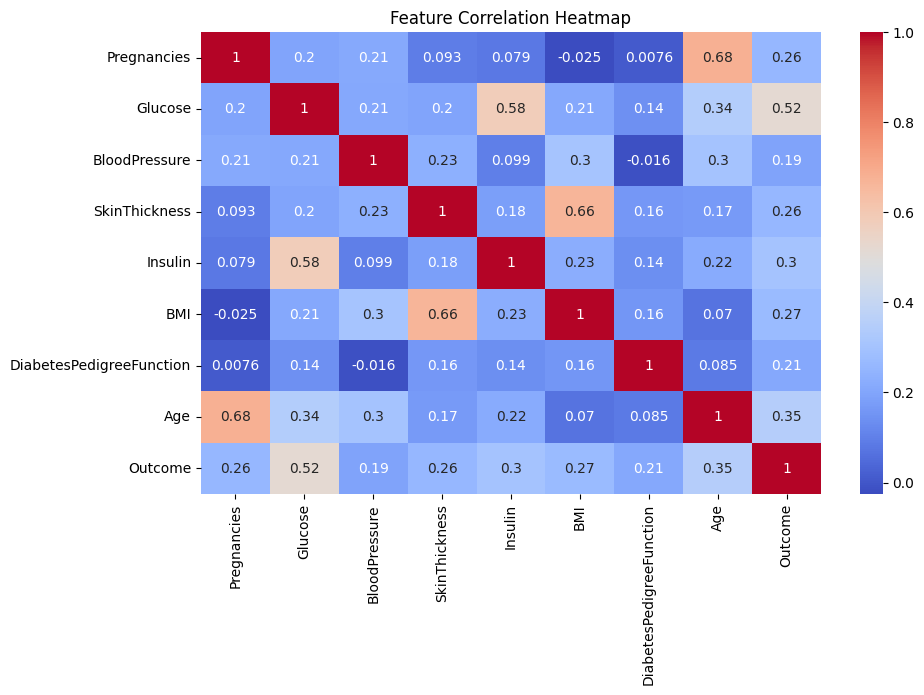

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outcome count
sns.countplot(data=df_clean, x='Outcome')
plt.title("Diabetes Outcome Count")
plt.show()

# Histogram of Glucose
sns.histplot(df_clean['Glucose'], kde=True)
plt.title("Distribution of Glucose")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()